## Image Gradient 
Image  gradient  is  the  directional  change  in  the  int
ensity  or  color 
in an image. For a gray-level image with gradual color, we can get 
all pixel values in the image, and then observe the
 changing trend 
of  intensity  as  a  whole.    The 
direction  of 
gradient  from  lower  values  to  higher  values  for  pix
els  can  be 
observed.  Besides,  gradient  strength  also  represent
s  the  speed  of 
intensity  changing.  If  some  pixels  have  higher  grad
ient  (i.e., 
higher  slope),  it  means  these  pixels  are  converting
  fast  and 
strongly  with  their  neighbor  pixels  in  intensity;  o
therwise,  it 
means these pixels are similar to their neighbor pi
xels and may be 
viewed as the background in an image

## Locating Title Region 
In order to extract the movie title from a movie po
ster image,  we 
utilize  the  quantity  of  gradient-conversion  method 
to  locate  the 
title region in an image because the title region i
s usually the one 
with gradient strength changed strongly in a movie 
poster. For the 
poster  with  the  resembled  color  between  the  title  r
egion  and 
background, the  gradient-conversion  is  not  signific
ant  so  that  the 
RGB color dimension used in the poster image should
 be reduced 
before  using  the  gradient-conversion  method.  Here, 
the  RGB 
color  dimension  is  reduced  from  256  to  220  such  tha
t  we  make 
each  color  far  from  others  to  increase  their  quanti
ty  of  gradient-
conversion

The  quantity  of  gradient-conversion  on  pixels  is  me
asured  for each  row.  Assuming  that  the  row  with  the  maximum  gr
adient-
conversion  is  within  the  candidate  region,  we  check
  upward  and 
downward  from  the  maximum  row,  respectively.  For  ch
ecking 
upward, if the difference value of gradient-convers
ion between the 
current  row  and  the  maximum  row  is  within  the  thres
hold,  the 
current  row  will  be  joined  in  the  candidate  region.
  Thus,  the 
height  of  the  candidate  region  is  gradually  increas
ed  until  the 
difference value exceeds the threshold. Then, check
ing downward 
is  similar  but  with  an  opposite  direction.  Finally,
  the  complete 
candidate   region   is   found.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
import cv2
img=cv2.imread('2.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

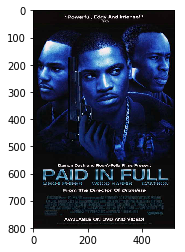

In [96]:
plt.imshow(img)
plt.show()

In [88]:
sobely = cv2.Sobel(gray_img,cv2.CV_64F,0,1,ksize=5)

In [89]:
sum_rows=sobely.sum(axis=1)

In [90]:
max_index=sum_rows.argmax(axis=0)

In [91]:
import heapq
temp=heapq.nlargest(150, range(len(sum_rows)), sum_rows.take)

In [92]:
threshold=40

In [93]:
final_img=sobely[max_index-threshold:max_index+threshold]
final_img

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 32., 32., 32.],
       [ 0.,  0.,  0., ..., 96., 96., 96.],
       [ 0.,  0.,  0., ..., 96., 96., 96.]])

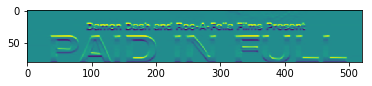

In [94]:
plt.imshow(final_img)
plt.show()

## Second Image

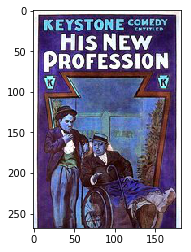

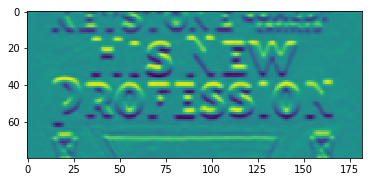

In [98]:
img=cv2.imread('4101.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()
sobely = cv2.Sobel(gray_img,cv2.CV_64F,0,1,ksize=5)
sum_rows=sobely.sum(axis=1)
max_index=sum_rows.argmax(axis=0)

import heapq
temp=heapq.nlargest(150, range(len(sum_rows)), sum_rows.take)

threshold=40
final_img=sobely[max_index-threshold:max_index+threshold]
final_img

plt.imshow(final_img)
plt.show()